In [86]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import utility
sns.set(font_scale=1.5) # setting seaborn default for plots

## 1. Collecting the data

In [87]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## 2. Exploring the data

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
train.shape

(891, 12)

In [91]:
test.shape

(418, 11)

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [94]:
# How much missing data do we have in the training set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
# How much missing data do we have in the testing set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data visualization with Seaborn
### Bar charts for Categorical Features
-  Pclass
-  Sex
-  SibSp (# of siblings and spouses aboard)
-  Parch (# of parents and childen aboard)
-  Embarked
-  Cabin

In [96]:
utility.get_categories_info(train)

Feature 'Name' has 891 unique categories
Feature 'Sex' has 2 unique categories
Feature 'Ticket' has 681 unique categories
Feature 'Cabin' has 148 unique categories
Feature 'Embarked' has 4 unique categories


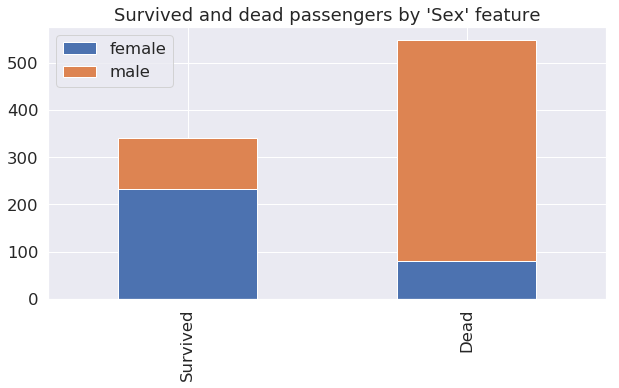

In [97]:
utility.bar_chart(train, 'Sex')

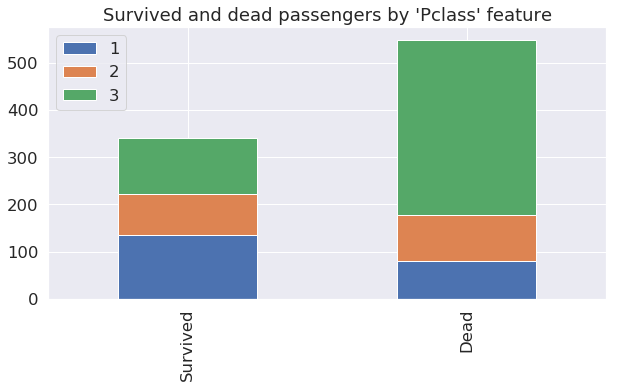

In [98]:
utility.bar_chart(train, 'Pclass')

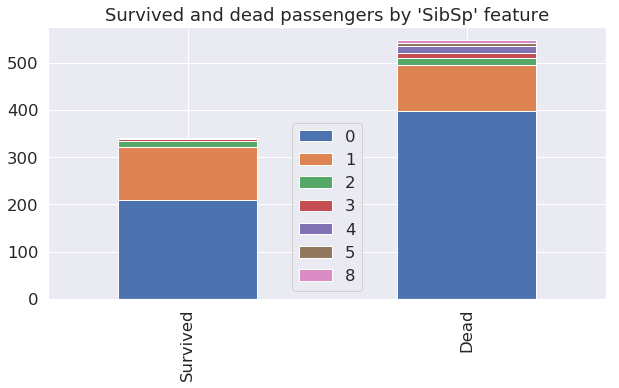

In [99]:
utility.bar_chart(train, 'SibSp')

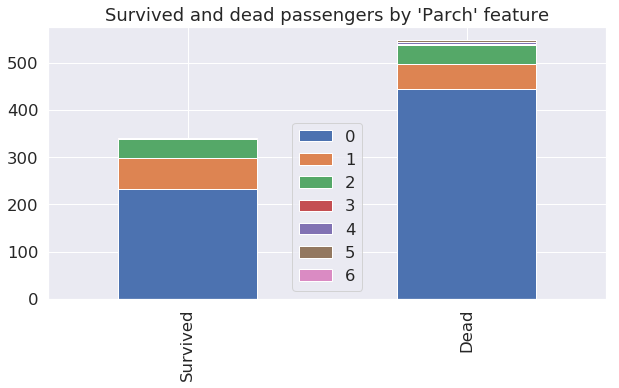

In [100]:
utility.bar_chart(train, 'Parch')

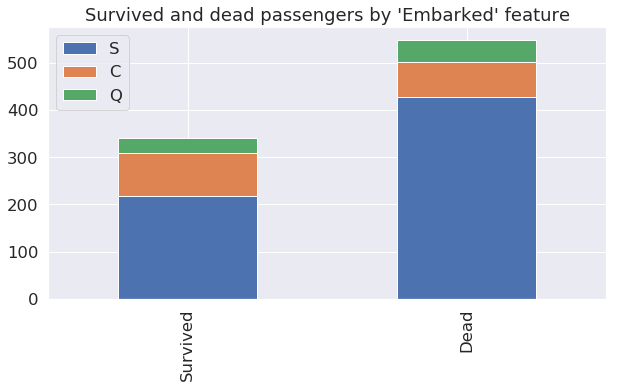

In [101]:
utility.bar_chart(train, 'Embarked')

## 4. Feature engineering

## 4.1 Name:
    ### 4.1.1 Extract title from names
    ### 4.1.2 Create new column 'Title' and drop 'Name'
    ### 4.1.3 Split 'Title' column into 4 categories: Mr, Miss, Mrs and Other
    ### 4.1.4 Map titles to numbers
            -  Mr: 0
            -  Miss: 1
            -  Mrs: 2
            -  Other: 3

In [102]:
train = utility.feature_engineer_title(train)
test = utility.feature_engineer_title(test)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


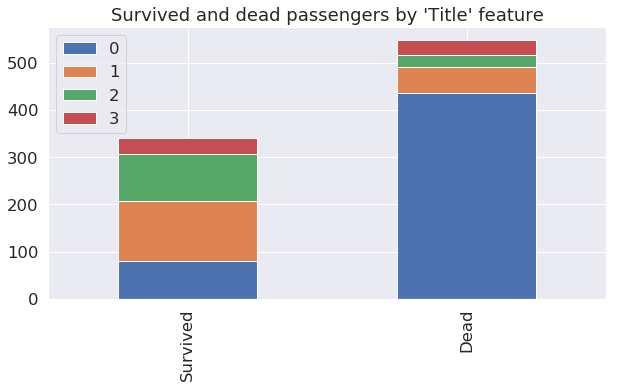

In [103]:
utility.bar_chart(train, 'Title')

## 4.3 Sex:
### Map Sexes to numbers
            -  Male: 0
            -  Female: 1

In [104]:
sex_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [105]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


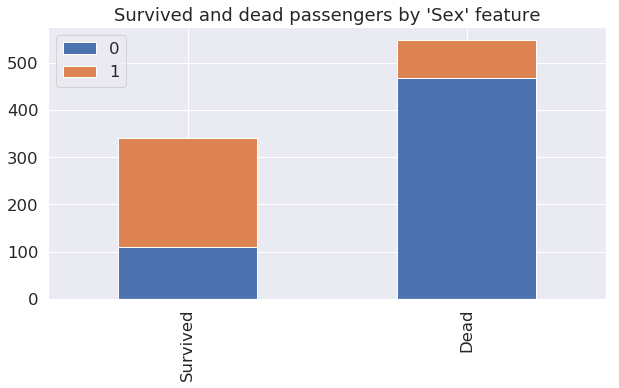

In [106]:
utility.bar_chart(train, 'Sex')

## 4.4 Age
First, we're going to compute the median age of each title. Then we're going to replace each missing value in 'age' with the correspending median of its Title.

In [107]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [108]:
train = utility.feature_engineer_age(train)
test = utility.feature_engineer_age(test)

/home/whitenoise/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


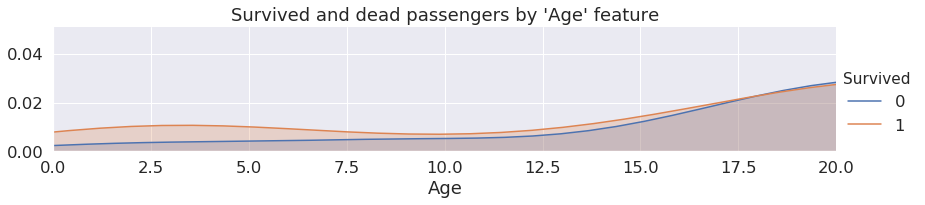

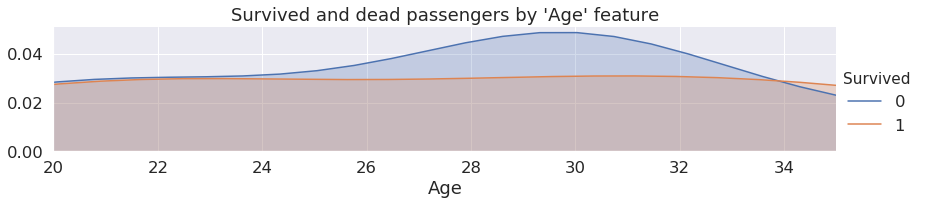

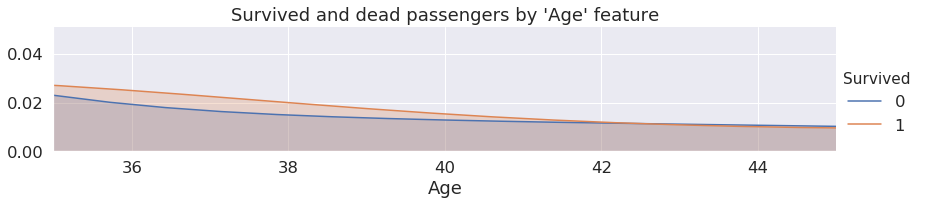

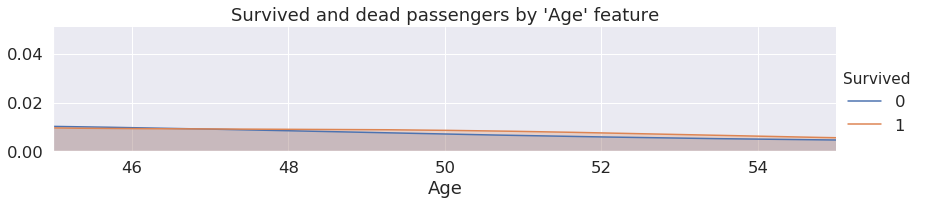

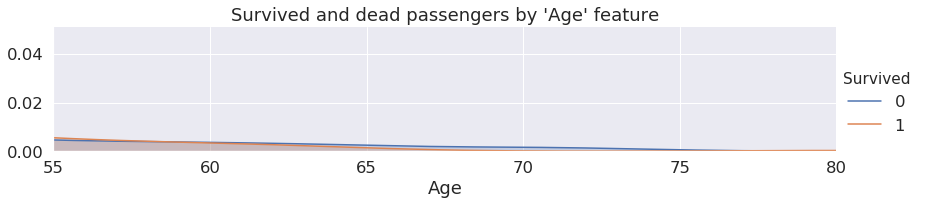

In [109]:
importlib.reload(utility)
# facetgrid plots
intervals = [[0, 20], [20, 35], [35,45], [45, 55], [55, 80]]
for interval in intervals:
    utility.lattice_plot(train, 'Age', interval)

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


## 4.4.1 Binning:
    ### We're going to convert 'Age' column from numerical to categorical such that:
        -  child <=16 : 0
        -  young >16 <=26: 1
        -  adult >26 <=36: 2
        -  mid-age >36 <=62: 3
        -  senior >62: 4

In [112]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [113]:
importlib.reload(utility)
train = utility.binning_age(train)
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


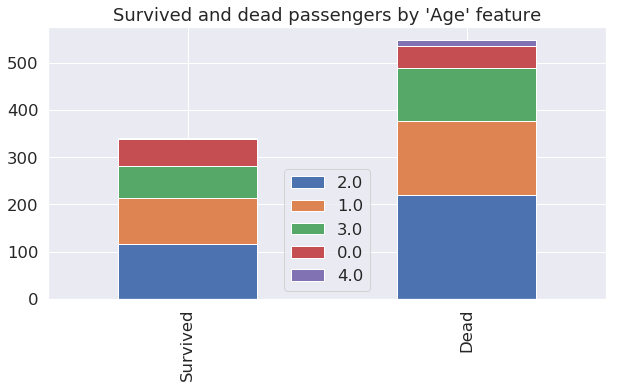

In [114]:
utility.bar_chart(train, 'Age')

## 4.5 Embarked
### 4.5.1 Filling the missing values


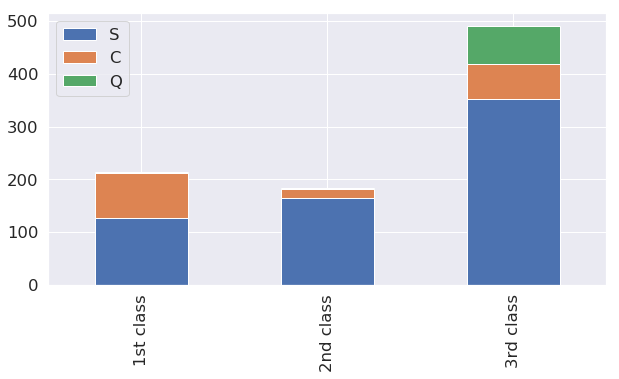

In [115]:
# Where did each class embarked?
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [116]:
# mapping 'Embarked' feature
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [117]:
for index_row, row in train.iterrows():
    if pd.isna(row['Embarked']):
        train.loc[index_row, 'Embarked'] = 0
train['Embarked'].values      

array([0., 1., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 1., 0., 0., 2., 0., 0., 0., 1., 0., 2., 0., 1., 1., 2., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 2., 0., 2., 2., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 0., 2., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 2., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 2.,
       0., 2., 0., 0., 0., 0., 0., 1., 1., 2., 0., 2., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 2., 1., 0., 0., 0., 0., 2., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [118]:
for index_row, row in test.iterrows():
    if pd.isna(row['Embarked']):
        test.loc[index_row, 'Embarked'] = 0
test['Embarked'].values  

array([2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0,
       1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0,

## 4.6 Fare

In [119]:
# filling missing fares with the median by title
train = utility.feature_engineer_fare(train)
test = utility.feature_engineer_fare(test)

/home/whitenoise/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


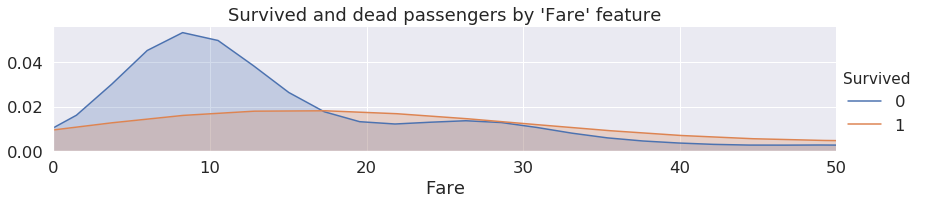

In [120]:
importlib.reload(utility)
utility.lattice_plot(train, 'Fare', [0, 50])

In [121]:
# fare binning
importlib.reload(utility)
train = utility.binning_fare(train)
test = utility.binning_fare(test)

In [122]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0.0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0.0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2.0,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0.0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0.0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0.0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1.0,2


## 4.7 Cabin

In [126]:
train['Cabin'].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
F33                3
C22 C26            3
E101               3
D                  3
F2                 3
B51 B53 B55        2
C68                2
B28                2
B57 B59 B63 B66    2
B18                2
C83                2
B58 B60            2
C126               2
F G73              2
C125               2
E121               2
E33                2
C124               2
C2                 2
F4                 2
C123               2
D20                2
E44                2
E24                2
D35                2
B77                2
D36                2
                  ..
D50                1
A31                1
C7                 1
D21                1
D48                1
C62 C64            1
E38                1
C47                1
D45                1
B102               1
A26                1
D7                 1
D9                 1
C101               1
B39                1
F E69              1
C104         

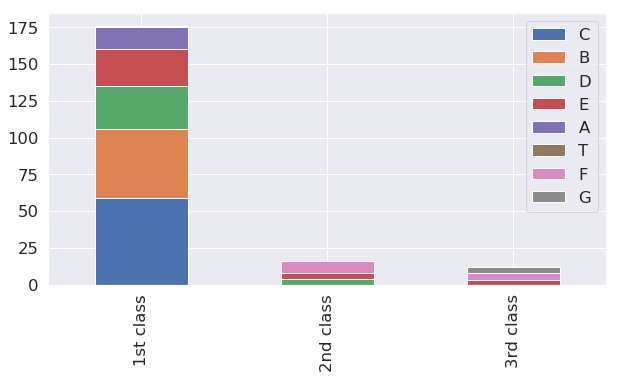

In [127]:
# Which cabin for each class?
Pclass1_cabins = train[train['Pclass']==1]['Cabin']
Pclass2_cabins = train[train['Pclass']==2]['Cabin']
Pclass3_cabins = train[train['Pclass']==3]['Cabin']
Pclass1 = pd.Series([cabin[0] if not pd.isnull(cabin) else np.nan for cabin in Pclass1_cabins.values]).value_counts()
Pclass2 = pd.Series([cabin[0] if not pd.isnull(cabin) else np.nan for cabin in Pclass2_cabins.values]).value_counts()
Pclass3 = pd.Series([cabin[0] if not pd.isnull(cabin) else np.nan for cabin in Pclass3_cabins.values]).value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))


In [128]:
importlib.reload(utility)
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)
train = utility.feature_engineer_cabin(train)
test = utility.feature_engineer_cabin(test)


## 4.8 FamilySize

In [129]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [130]:
train = train.drop('Parch', 1)
train = train.drop('SibSp', 1)
test = test.drop('Parch', 1)
test = test.drop('SibSp', 1)

/home/whitenoise/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


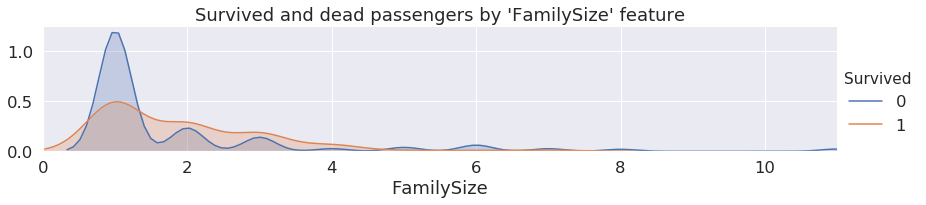

In [131]:
utility.lattice_plot(train, 'FamilySize', [0, train['FamilySize'].max()])

In [132]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11:4}
train['FamilySize'] = train['FamilySize'].map(family_mapping)
test['FamilySize'] = test['FamilySize'].map(family_mapping)

In [133]:
passengerID_train = train['PassengerId']
passengerID_test = test['PassengerId']
train = train.drop('PassengerId', 1)
test = test.drop('PassengerId', 1)


In [134]:
# final result after cleaning the data
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,A/5 21171,0.0,0.0,0.0,0,0.4
1,1,1,1,3.0,PC 17599,2.0,1.0,1.0,2,0.4
2,1,3,1,1.0,STON/O2. 3101282,0.0,0.0,0.0,1,0.0
3,1,1,1,2.0,113803,2.0,1.0,0.0,2,0.4
4,0,3,0,2.0,373450,0.0,0.0,0.0,0,0.0


## 5. Modelling

In [202]:
# Separating the data
y_train = train['Survived']
X_train = train.drop('Survived', 1)
X_train = X_train.drop('Ticket', 1)
X_test = test.drop('Ticket', 1)

KeyError: "['Ticket'] not found in axis"

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


## 5.2 Cross validation (K-fold)

In [150]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 5.2.1 K-NN

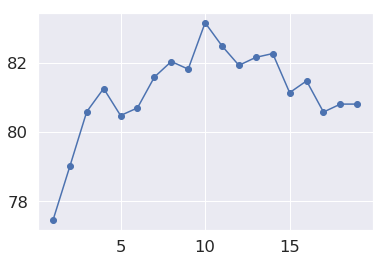

In [197]:
accuracies = []
for k in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    scoring = 'accuracy'
    score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
    accuracy = round(np.mean(score) * 100, 2)
    accuracies.append(accuracy)

plt.plot(range(1, 20), accuracies, 'o-')


In [178]:
# The best accuracy for knn is for k=10
clf = KNeighborsClassifier(n_neighbors=10)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
accuracy = round(np.mean(score) * 100, 2)

accuracy

83.16

## 6.2 Decision tree

In [208]:
clf = DecisionTreeClassifier()
scoring='accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
accuracy = round(np.mean(score) * 100, 2)

accuracy

80.14

## 6.3 Random forest

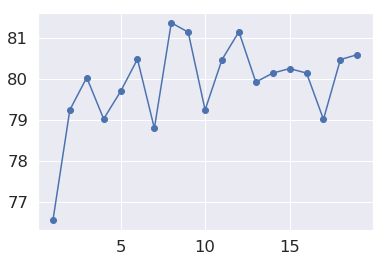

In [214]:
accuracies = []
for n in range(1, 20):
    clf = RandomForestClassifier(n_estimators=n)
    scoring='accuracy'
    score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
    accuracy = round(np.mean(score) * 100, 2)
    accuracies.append(accuracy)

plt.plot(range(1, 20), accuracies, 'o-')

In [219]:
clf = RandomForestClassifier(n_estimators=15)
scoring='accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
accuracy = round(np.mean(score) * 100, 2)

accuracy

80.25

## 6.4 SVM

In [220]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
accuracy = round(np.mean(score) * 100, 2)

accuracy

83.28

## 7 Testing

In [221]:
clf = SVC()
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

In [225]:
submission = pd.DataFrame({
    'PassengerId': passengerID_test,
    'Survived': prediction
})

submission.to_csv('submission.csv', index=False)

,PassenegerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0
